In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Reading Dataset 

In [102]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


- This is Supervised ML Problem.
- This is Classification Problem.
- This is a Binary Classification Problem.

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [104]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

- Independent Feature->'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'
- Dependent Feature->'Outcome'

Descriptive Statistic of Dataset.

In [105]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Pregnancies	Glucose	BloodPressure	SkinThickness	Insulin	BMI have '0' value present

In [106]:
df.shape

(768, 9)

Checking The Balanced or Not by using Distribution.

In [107]:
df['Outcome'].value_counts()*100/len(df)

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

0 present 65% and 1 present 34% so data is imbalanced.

<Axes: xlabel='Age', ylabel='Count'>

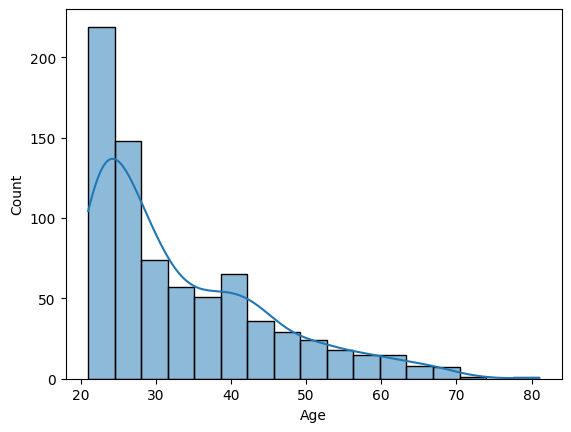

In [108]:
sns.histplot(df['Age'],kde=True)

In [109]:
columns_to_plot=df.columns

In [110]:
columns_to_plot

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

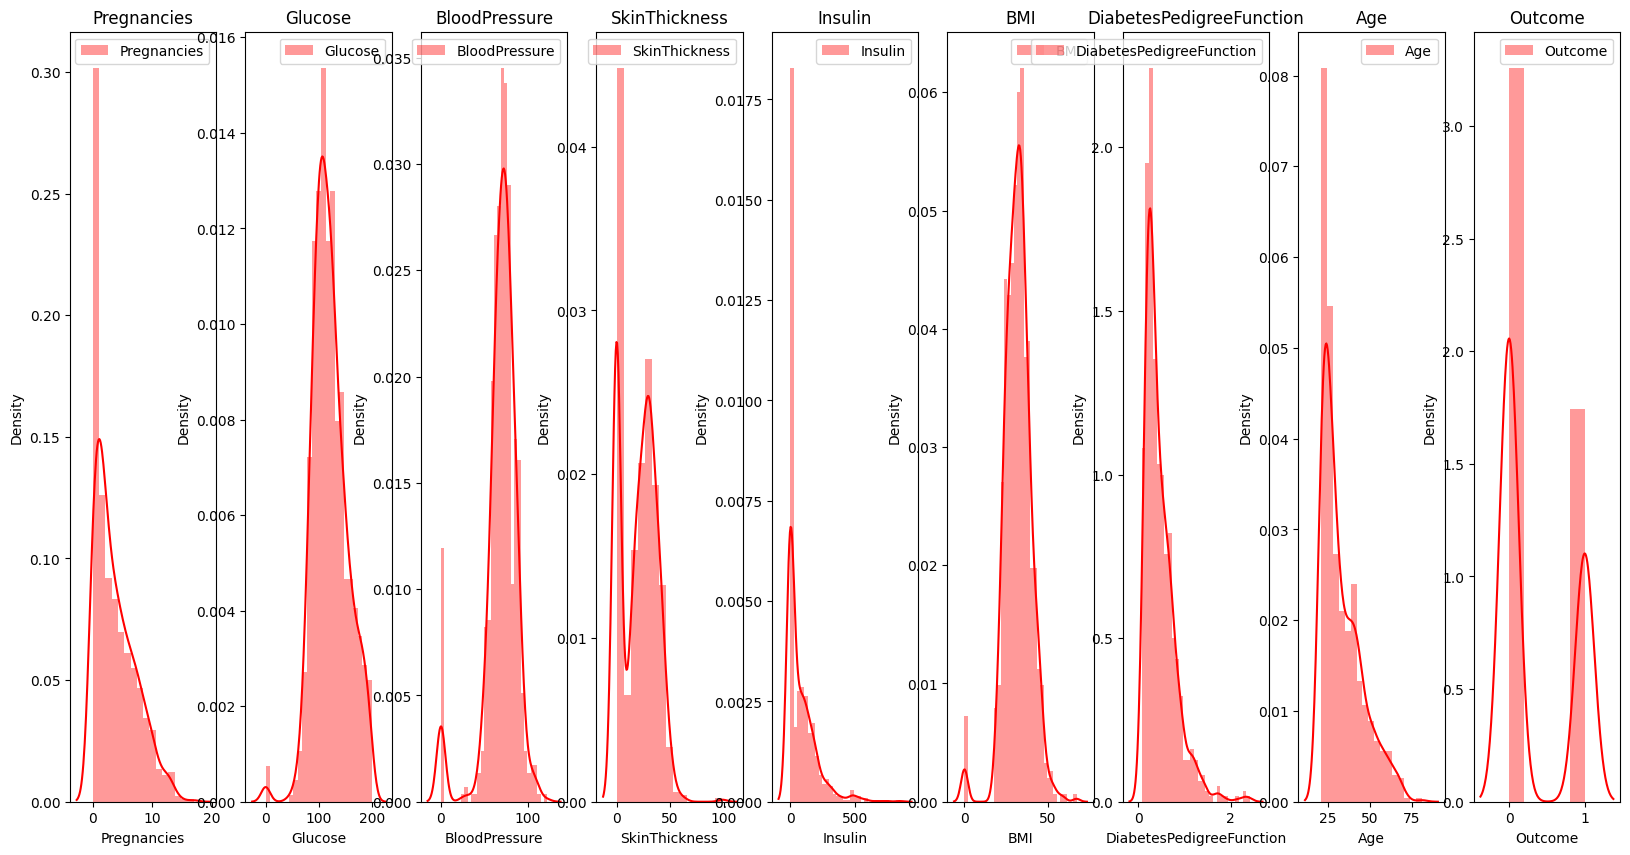

In [111]:
fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_plot), figsize=(20, 10))
for idx, col in enumerate(columns_to_plot):
    sns.distplot(df[col], kde=True, label=col, color='red', ax=axes[idx])
    axes[idx].set_title(col)
    axes[idx].legend()

([<matplotlib.patches.Wedge at 0x138095d9210>,
 [Text(-0.5025943242672991, 0.9784676515931925, ''),
  Text(0.5025944158780503, -0.9784676045369114, '')],
 [Text(-0.27414235869125403, 0.5337096281417413, '65.1%'),
  Text(0.2741424086607547, -0.5337096024746789, '34.9%')])

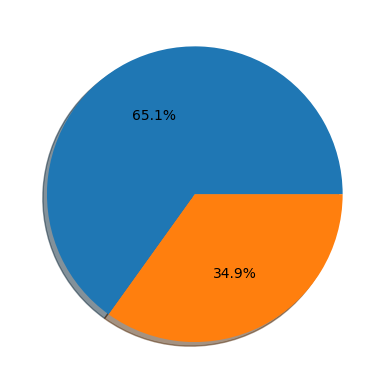

In [112]:
plt.pie(df['Outcome'].value_counts(),autopct='%1.1f%%',shadow=True)

<Axes: >

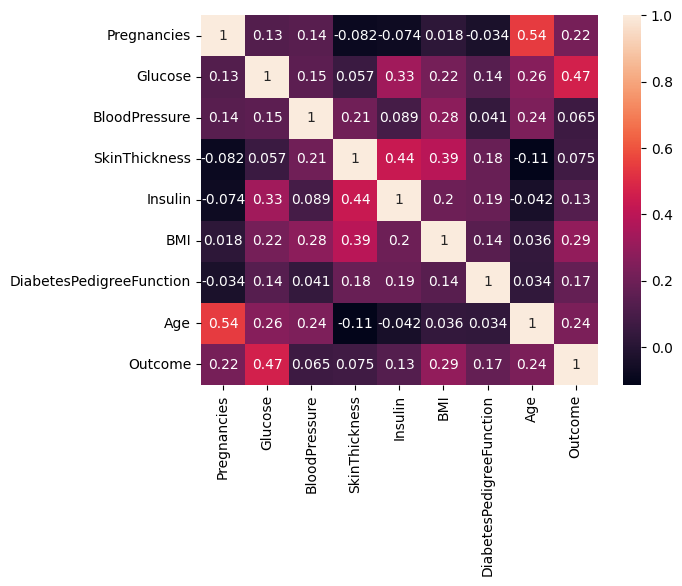

In [113]:
sns.heatmap(df.corr(),annot=True)

finding max and min and mean of all col with respect to outcome

In [114]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [115]:
df.groupby('Outcome')['Pregnancies'].min()

Outcome
0    0
1    0
Name: Pregnancies, dtype: int64

In [116]:
# for col in df.columns:
#     man_v=df.groupby('Outcome')[col].min()
#     print(man_v)

In [117]:
# for col in df.columns:
#     max_v=df.groupby('Outcome')[col].max()
#     print(max_v)

In [118]:
# for col in df.columns:
#     mean_v=df.groupby('Outcome')[col].mean()
#     print(mean_v)

EDA part completed

Data preprocessing start

In [119]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [120]:
df['BloodPressure'].min()

0

- no NAN value present but in place of nan value 0 are present.
- for eg in BP col min value is 0 but a person alive how there BP is zero.

In [121]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [122]:
df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]=df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']].replace(0,np.NaN)

In [123]:
df.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [124]:
df.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1


In [125]:
import missingno as msno

<Axes: >

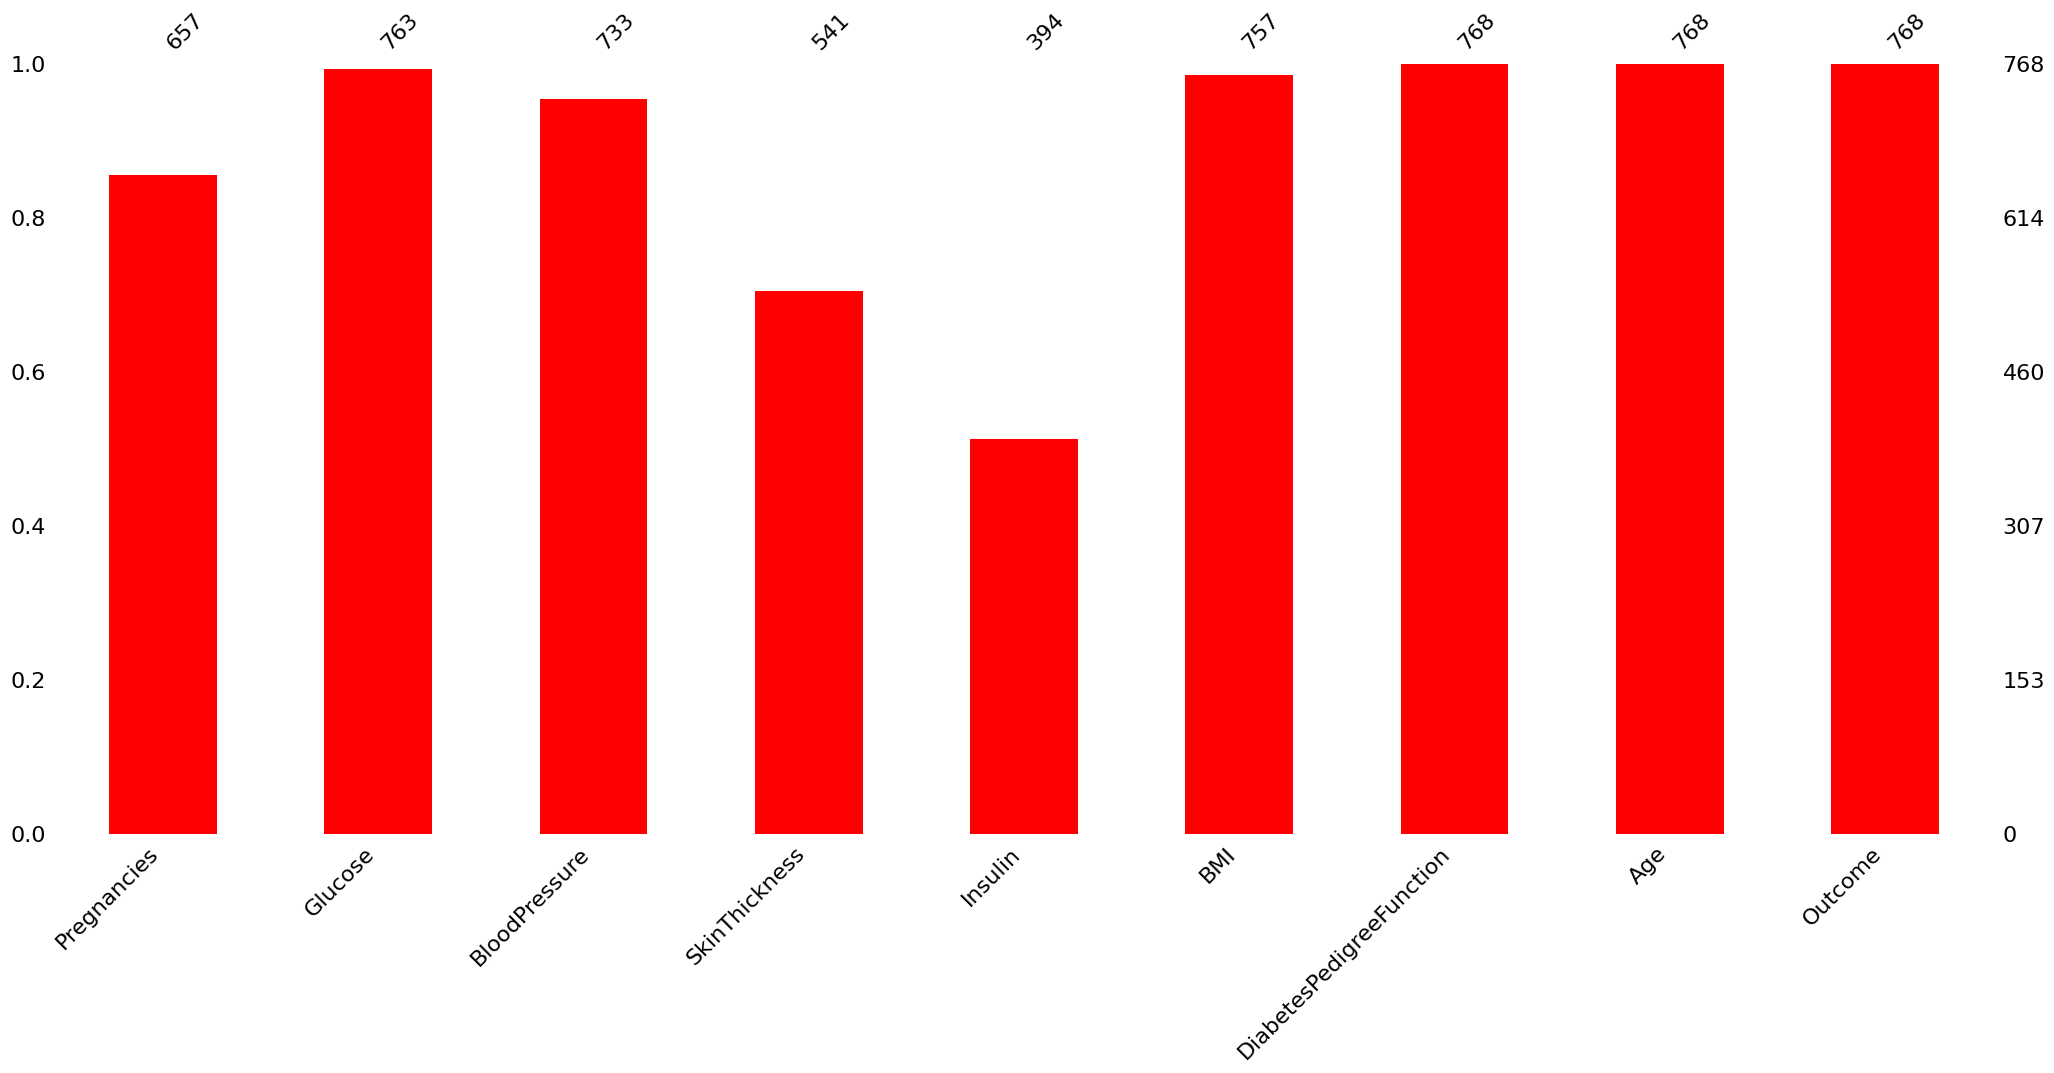

In [126]:
msno.bar(df,color='red')

<Axes: >

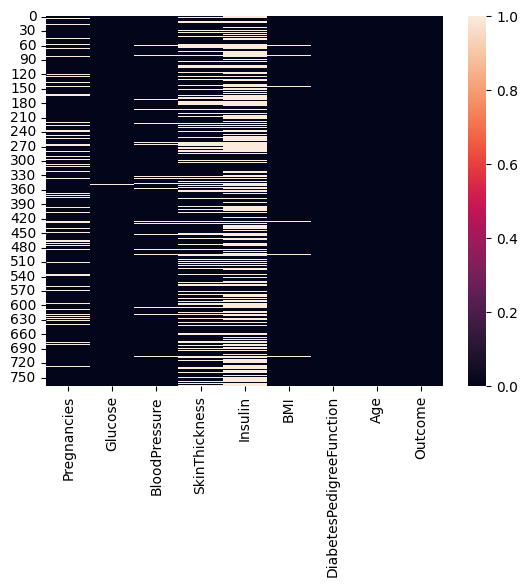

In [127]:
sns.heatmap(df.isnull())

In [128]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [129]:
medians = df.groupby('Outcome').transform('median')

In [130]:
medians.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,5.0,140.0,74.5,32.0,169.5,34.3,0.449,36.0
1,3.0,107.0,70.0,27.0,102.5,30.1,0.336,27.0
2,5.0,140.0,74.5,32.0,169.5,34.3,0.449,36.0
3,3.0,107.0,70.0,27.0,102.5,30.1,0.336,27.0
4,5.0,140.0,74.5,32.0,169.5,34.3,0.449,36.0


In [131]:
df = df.fillna(medians)

In [132]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


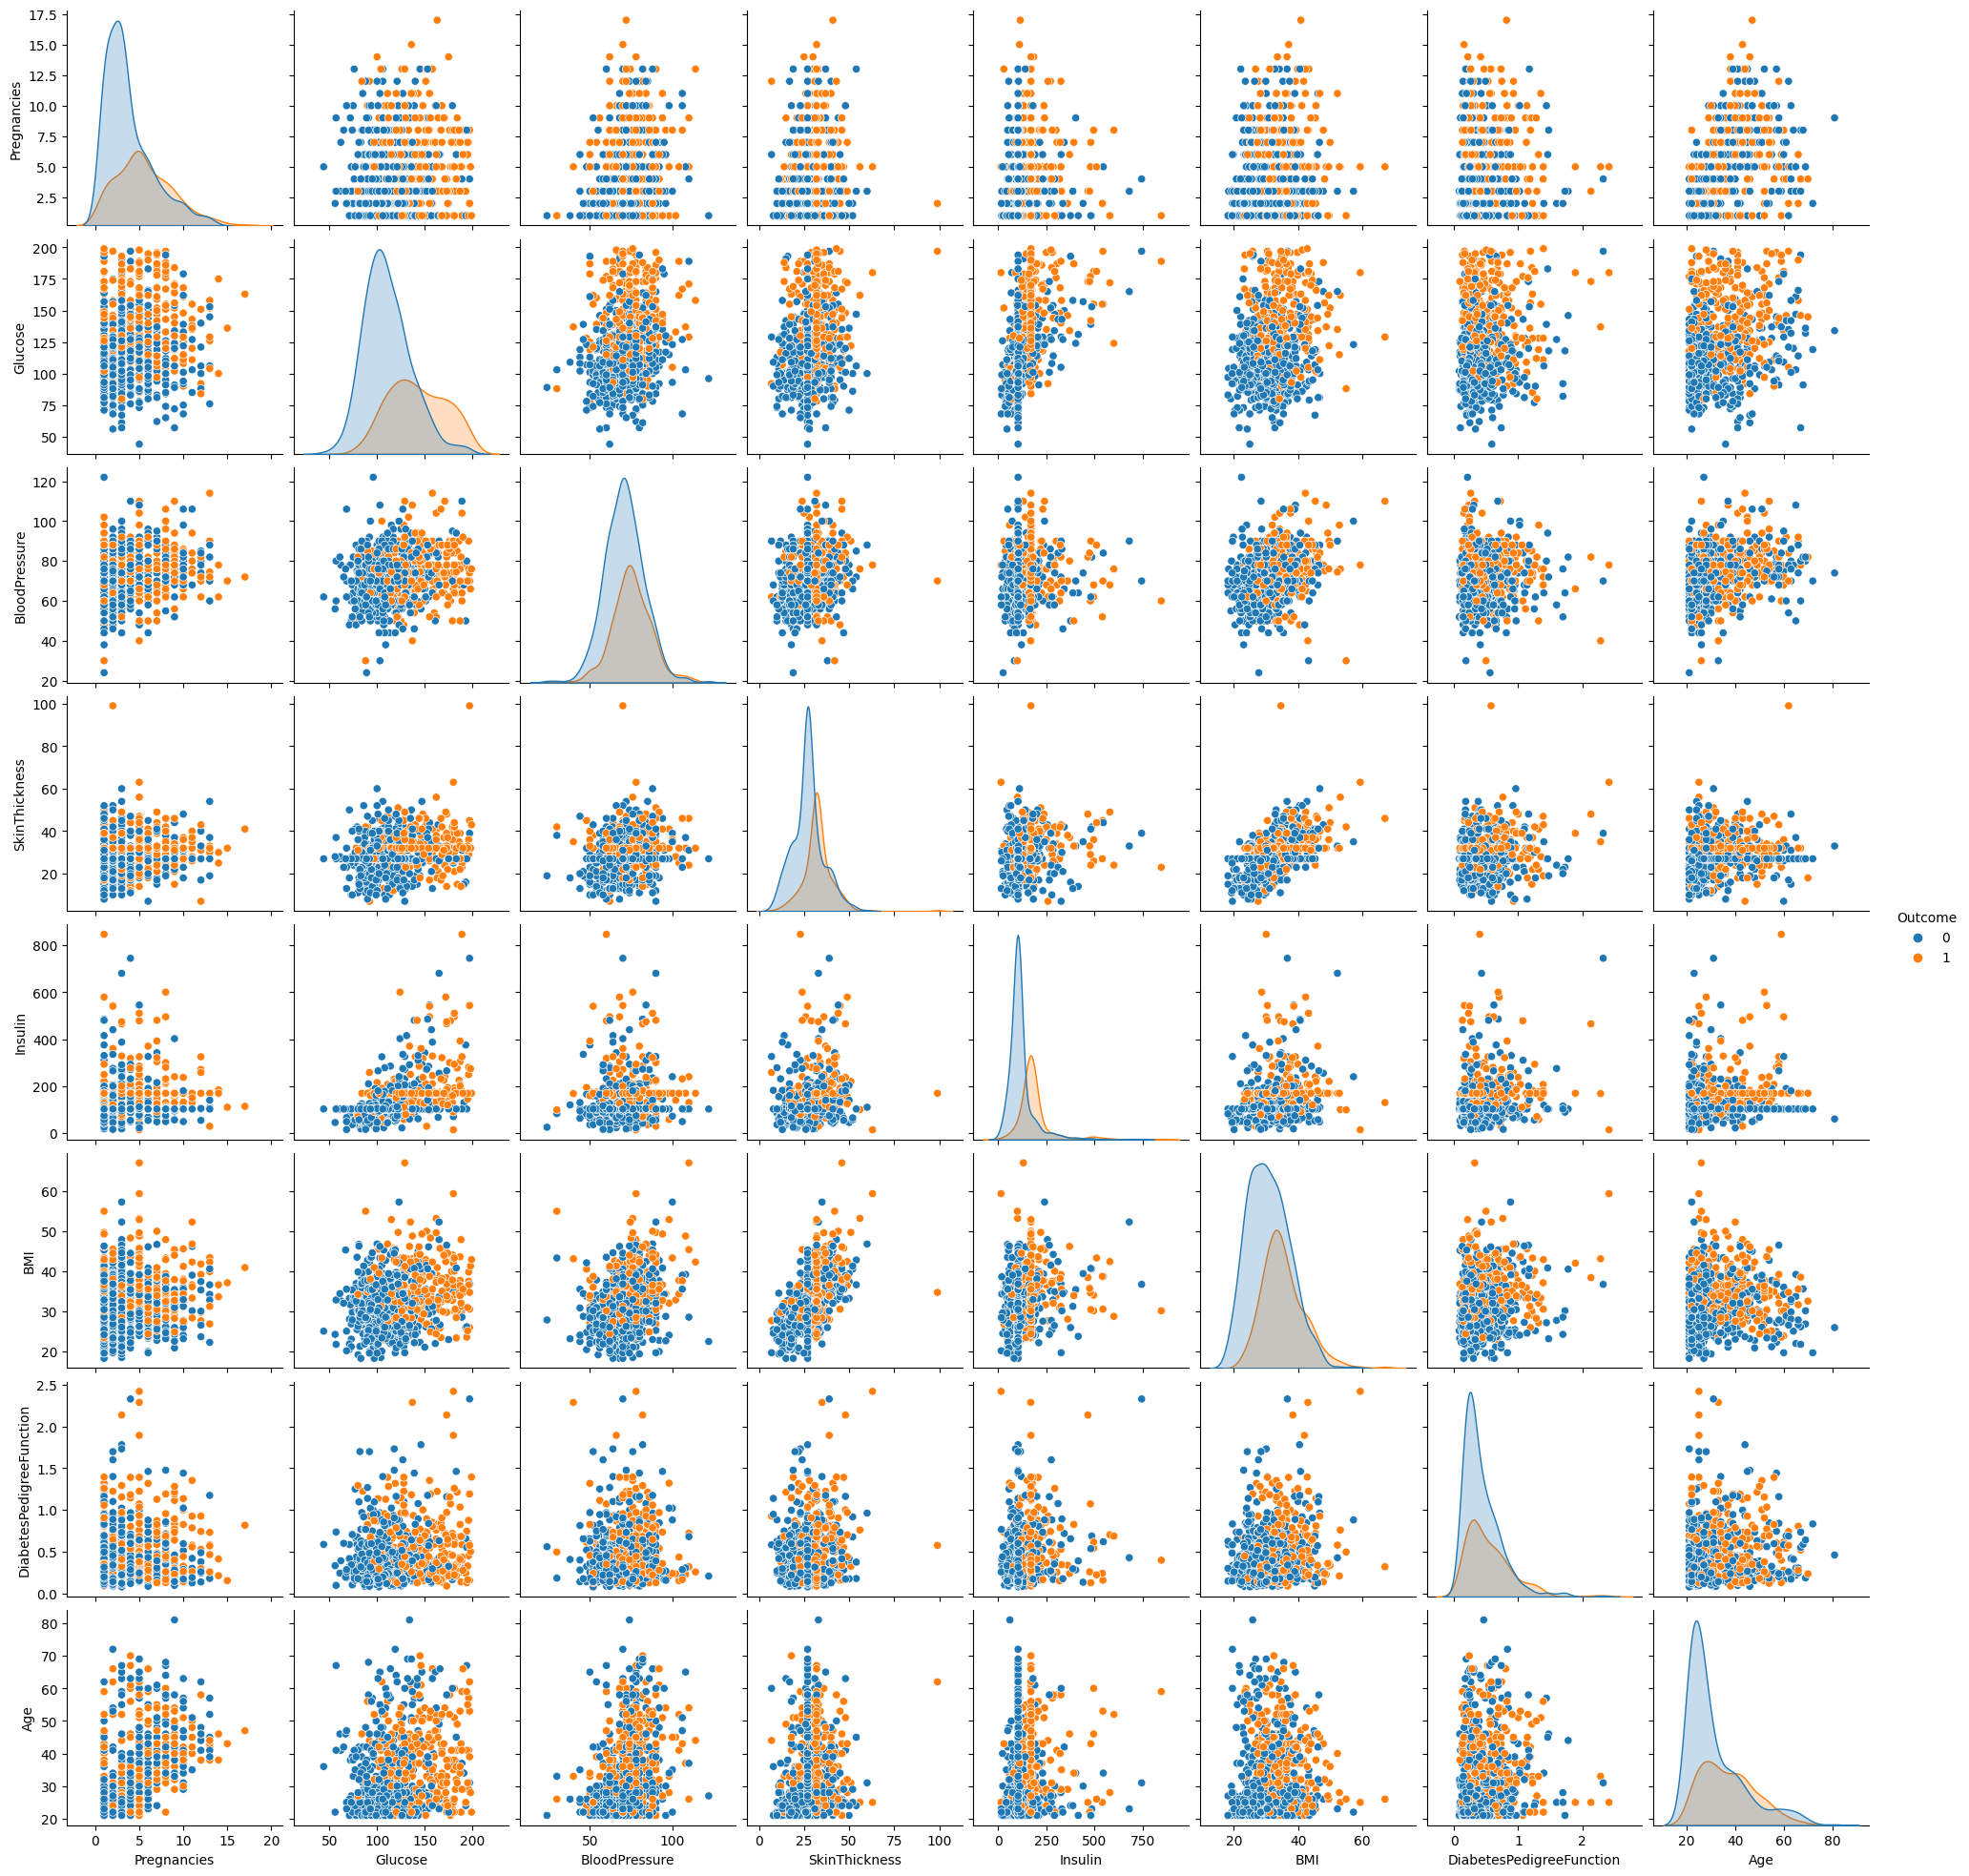

In [133]:
sns.pairplot(df,hue='Outcome')

Outlier Detection using IQR

- lower_limt=Q1-1.5*IQR
- upper_limt=Q1+1.5*IQR

In [134]:
out_col=[]
for feature in df:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR
    if df[(df[feature]>upper)].any(axis=None):
        out_col.append(feature)
        print(feature, "yes")
    else:
        print(feature, "no")

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


In [135]:
out_col

['Pregnancies',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

<Axes: >

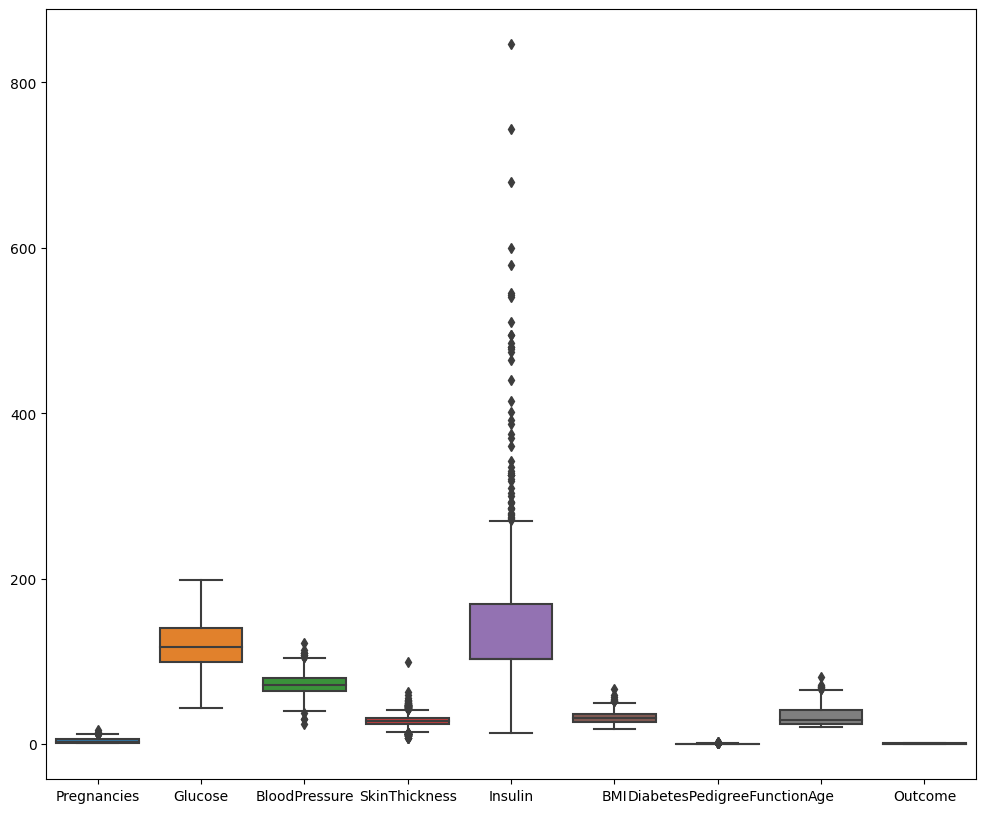

In [136]:
plt.figure(figsize=(12,10))
sns.boxplot(df)

In [137]:
for col in out_col:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR
    df.loc[df[col] > upper, col] = upper
    df.loc[df[col] < lower, col] = lower

<Axes: >

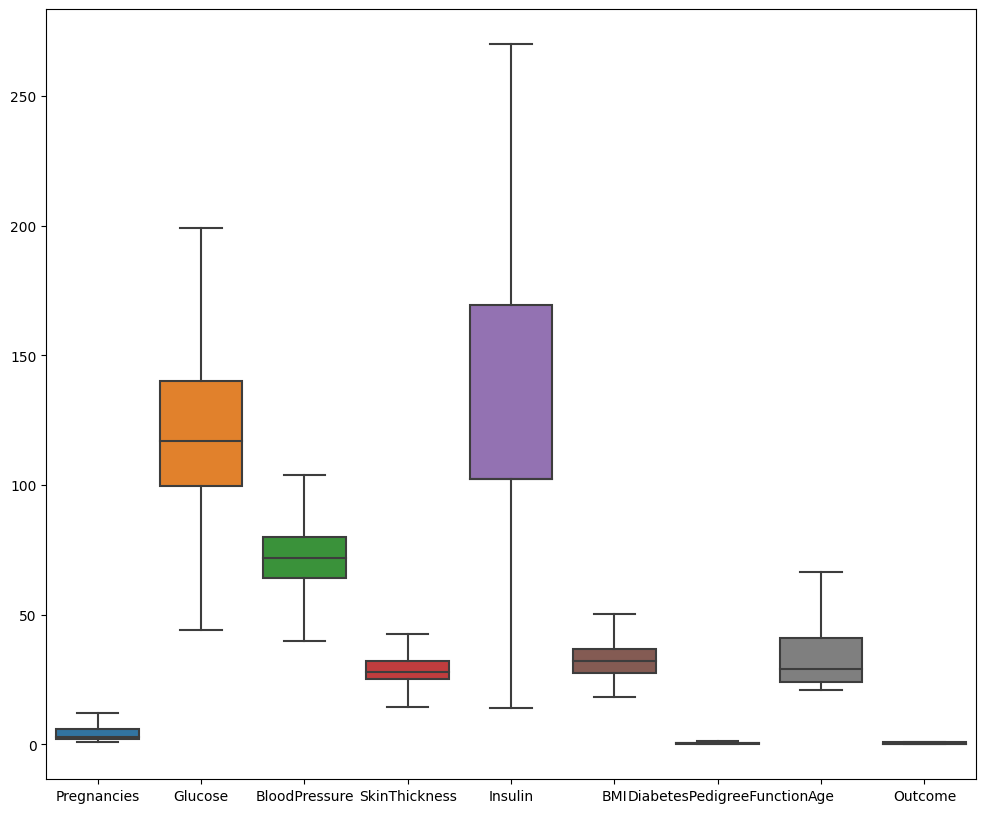

In [138]:
plt.figure(figsize=(12,10))
sns.boxplot(df)

In [139]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31.0,0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,5.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0,1


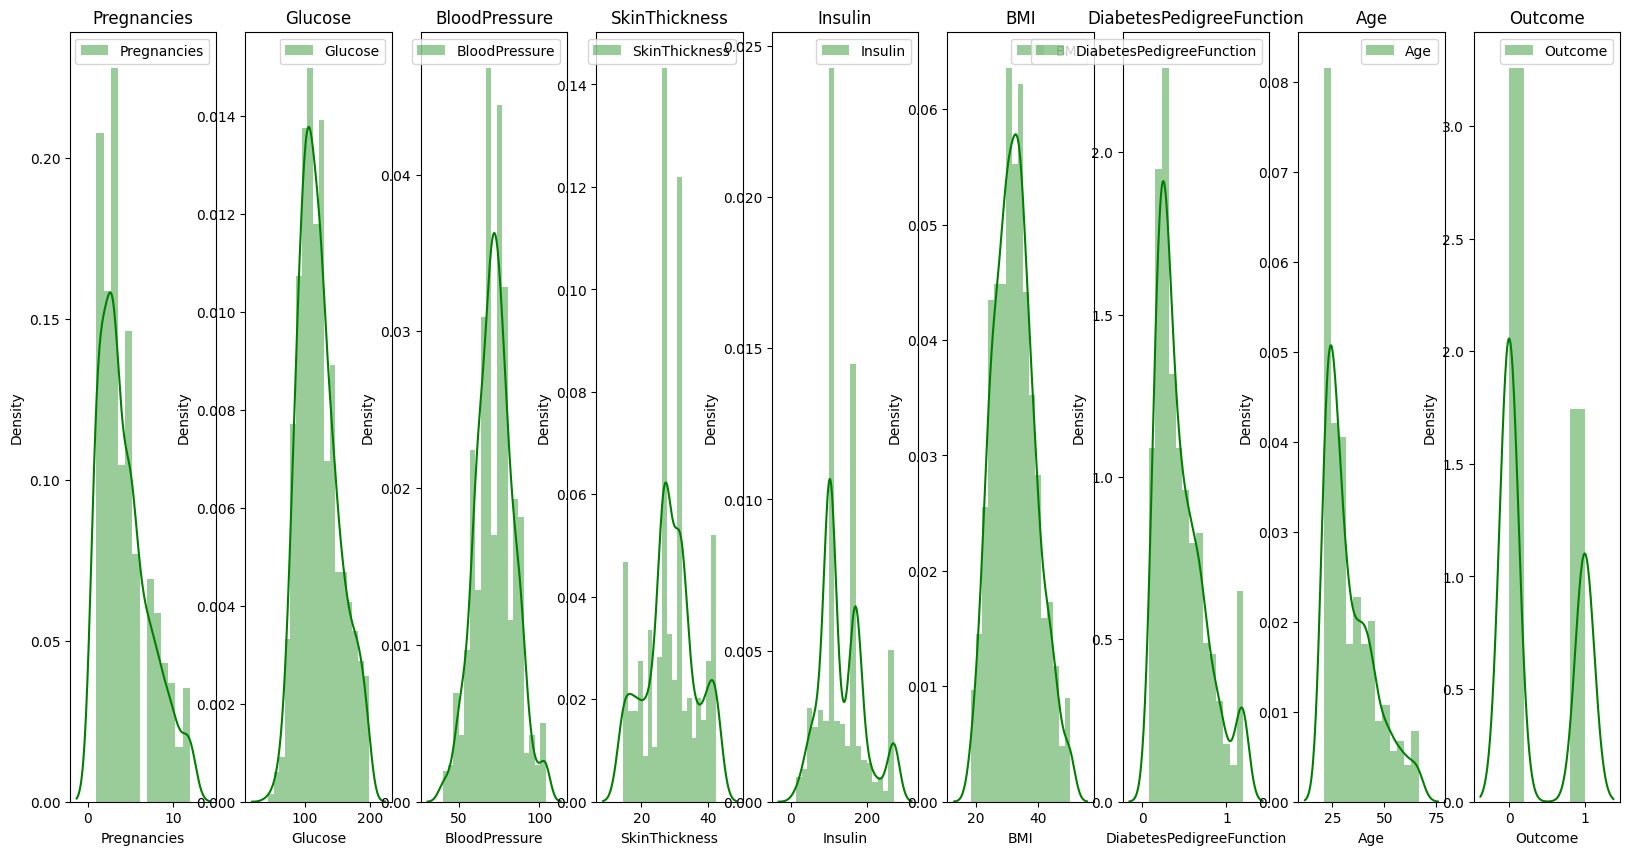

In [140]:
fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_plot), figsize=(20, 10))
for idx, col in enumerate(columns_to_plot):
    sns.distplot(df[col], kde=True, label=col, color='green', ax=axes[idx])
    axes[idx].set_title(col)
    axes[idx].legend()


In [141]:
df.shape

(768, 9)

In [142]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31.0,0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,5.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0,1


# Feature Engineering

In [143]:
NewBMI = pd.Series(["Underweight","Normal", "Overweight","Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")

In [144]:
NewBMI

0    Underweight
1         Normal
2     Overweight
3      Obesity 1
4      Obesity 2
5      Obesity 3
dtype: category
Categories (6, object): ['Normal', 'Obesity 1', 'Obesity 2', 'Obesity 3', 'Overweight', 'Underweight']

![BMI Reference](https://www.researchgate.net/publication/309016517/figure/tbl2/AS:613447846858812@1523268772716/World-Health-Organization-body-mass-index-classification.png "BMI Reference")


In [145]:
df['NewBMI'] = NewBMI
df.loc[df["BMI"]<18.5, "NewBMI"] = NewBMI[0]
df.loc[(df["BMI"]>18.5) & df["BMI"]<=24.9, "NewBMI"] = NewBMI[1]
df.loc[(df["BMI"]>24.9) & df["BMI"]<=29.9, "NewBMI"] = NewBMI[2]
df.loc[(df["BMI"]>29.9) & df["BMI"]<=34.9, "NewBMI"] = NewBMI[3]
df.loc[(df["BMI"]>34.9) & df["BMI"]<=39.9, "NewBMI"] = NewBMI[4]
df.loc[df["BMI"]>39.9, "NewBMI"] = NewBMI[5]

In [146]:
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI
622,6.0,183.0,94.0,27.0,102.5,40.8,1.200,45.0,0,Obesity 3
477,7.0,114.0,76.0,17.0,110.0,23.8,0.466,31.0,0,Obesity 2
642,6.0,147.0,80.0,32.0,169.5,29.5,0.178,50.0,1,Obesity 2
447,3.0,95.0,80.0,42.5,92.0,36.5,0.330,26.0,0,Obesity 2
204,6.0,103.0,72.0,32.0,190.0,37.7,0.324,55.0,0,Obesity 2


In [147]:
def set_insuline(row):
    if row["Insulin"]>=16 and row["Insulin"]<=166:
        return "Normal"
    else:
        return "Abnormal"

In [148]:
df=df.assign(NewInsulinScore=df.apply(set_insuline, axis=1))

In [149]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50.0,1,Obesity 2,Abnormal
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31.0,0,Obesity 2,Normal
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32.0,1,Obesity 2,Abnormal
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0,Obesity 2,Normal
4,5.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0,1,Obesity 3,Abnormal


In [150]:
# Some intervals were determined according to the glucose variable and these were assigned categorical variables.
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"], dtype = "category")
df["NewGlucose"] = NewGlucose
df.loc[df["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]
df.loc[(df["Glucose"] > 70) & (df["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
df.loc[(df["Glucose"] > 99) & (df["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]
df.loc[df["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]

In [151]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore,NewGlucose
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50.0,1,Obesity 2,Abnormal,Secret
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31.0,0,Obesity 2,Normal,Normal
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32.0,1,Obesity 2,Abnormal,Secret
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0,Obesity 2,Normal,Normal
4,5.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0,1,Obesity 3,Abnormal,Secret


In [152]:
# One hot encoding
df = pd.get_dummies(df, columns = ["NewBMI", "NewInsulinScore", "NewGlucose"], drop_first=True,dtype=int)

In [153]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50.0,1,0,1,0,0,0,0,0,0,0,1
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31.0,0,0,1,0,0,0,1,0,1,0,0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32.0,1,0,1,0,0,0,0,0,0,0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0,0,1,0,0,0,1,0,1,0,0
4,5.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0,1,0,0,1,0,0,0,0,0,0,1


In [154]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'],
      dtype='object')

In [155]:
y=df['Outcome']
X=df.drop(['Outcome'], axis=1)

In [156]:
y.value_counts()*100/len(y)

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

Data Balancing

In [157]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [158]:
y_resampled.value_counts()*100/len(y_resampled)

Outcome
1    50.0
0    50.0
Name: count, dtype: float64

In [159]:
from sklearn.model_selection import train_test_split

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [161]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

800
800
200
200


Scaleing

In [162]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


# Machine Learning Algo

In [163]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [164]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print(accuracy_score(y_train, log_reg.predict(X_train)))
log_acc=accuracy_score(y_test, log_reg.predict(X_test))
print(accuracy_score(y_test, log_reg.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

0.88125
0.845
[[85 14]
 [17 84]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        99
           1       0.86      0.83      0.84       101

    accuracy                           0.84       200
   macro avg       0.85      0.85      0.84       200
weighted avg       0.85      0.84      0.84       200



In [165]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_train, knn.predict(X_train)))
knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(accuracy_score(y_test, knn.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.90375
0.855
[[82 17]
 [12 89]]
              precision    recall  f1-score   support

           0       0.87      0.83      0.85        99
           1       0.84      0.88      0.86       101

    accuracy                           0.85       200
   macro avg       0.86      0.85      0.85       200
weighted avg       0.86      0.85      0.85       200



In [166]:
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(accuracy_score(y_train, svm.predict(X_train)))
print(accuracy_score(y_test, svm.predict(X_test)))
svm_acc=accuracy_score(y_test, svm.predict(X_test))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8575
0.84
[[84 15]
 [17 84]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84        99
           1       0.85      0.83      0.84       101

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200



In [167]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
train_accuracy = accuracy_score(y_train, decision_tree.predict(X_train))
print("Training Accuracy:", train_accuracy)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training Accuracy: 1.0
Test Accuracy: 0.83
[[82 17]
 [17 84]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        99
           1       0.83      0.83      0.83       101

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200



In [168]:
# hyperparameter tuning of dt
grid_param = {
    'criterion':['gini','entropy'],
    'max_depth' :  [3,5,7,10],
    'splitter' : ['best','radom'],
    'min_samples_leaf':[1,2,3,5,7], 
    'min_samples_split':[1,2,3,5,7], 
    'max_features':['auto','sqrt','log2']
}
grid_search_dt = GridSearchCV(decision_tree, grid_param, cv=50, n_jobs=-1, verbose = 1)
grid_search_dt.fit(X_train, y_train)

Fitting 50 folds for each of 1200 candidates, totalling 60000 fits


GridSearchCV(cv=50, estimator=DecisionTreeClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'radom']},
             verbose=1)

In [169]:
grid_search_dt.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 7,
 'splitter': 'best'}

In [170]:
decision_tree = grid_search_dt.best_estimator_
y_pred = decision_tree.predict(X_test)
print(accuracy_score(y_train, decision_tree.predict(X_train)))
dt_acc = accuracy_score(y_test, decision_tree.predict(X_test))
print(accuracy_score(y_test, decision_tree.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.93
0.84
[[86 13]
 [19 82]]
              precision    recall  f1-score   support

           0       0.82      0.87      0.84        99
           1       0.86      0.81      0.84       101

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200



In [171]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
train_accuracy = accuracy_score(y_train, random_forest.predict(X_train))
print("Training Accuracy:", train_accuracy)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Training Accuracy: 1.0
Test Accuracy: 0.885
Confusion Matrix:
[[87 12]
 [11 90]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88        99
           1       0.88      0.89      0.89       101

    accuracy                           0.89       200
   macro avg       0.89      0.88      0.88       200
weighted avg       0.89      0.89      0.88       200



In [172]:
# hyperparameter tuning of dt
grid_param = {
    'criterion':['gini','entropy'],
   'n_estimators': [25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9], 
}
grid_search_rf = GridSearchCV(random_forest, grid_param, cv=5, n_jobs=-1, verbose = 1)
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 6, 9],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [3, 6, 9],
                         'n_estimators': [25, 50, 100, 150]},
             verbose=1)

In [173]:
grid_search_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': 9,
 'n_estimators': 25}

In [174]:
random_forest = grid_search_rf.best_estimator_
y_pred = random_forest.predict(X_test)
print(accuracy_score(y_train, random_forest.predict(X_train)))
rf_acc = accuracy_score(y_test, random_forest.predict(X_test))
print(accuracy_score(y_test, random_forest.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.90125
0.89
[[89 10]
 [12 89]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89        99
           1       0.90      0.88      0.89       101

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.89      0.89       200



In [175]:
accuracy_df = pd.DataFrame({
    "Model":["LogisticRegression","KNeighborsClassifier","SVC","DecisionTreeClassifier","RandomForestClassifier"],
    "Accuracy":[float(log_acc),float(knn_acc),float(svm_acc),float(dt_acc),float(rf_acc)]
})

In [176]:
accuracy_df

,Model,Accuracy
0,LogisticRegression,0.845
1,KNeighborsClassifier,0.855
2,SVC,0.840
3,DecisionTreeClassifier,0.840
4,RandomForestClassifier,0.890


<Axes: xlabel='Model', ylabel='Accuracy'>

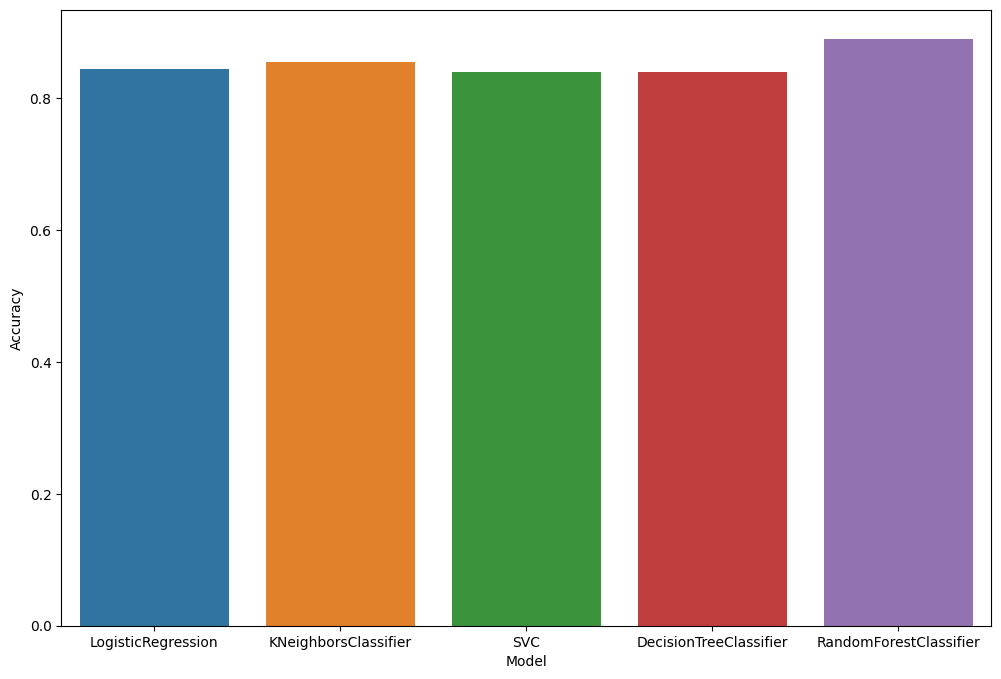

In [177]:
plt.figure(figsize=(12,8))
sns.barplot(data=accuracy_df,x="Model",y="Accuracy")

# THE END